In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# Getting Data
---

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
#get shape of data

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [25]:
training_samples = X_train.shape[0]
testing_samples = X_test.shape[0]
image_size = X_train.shape[1]

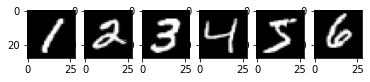

In [7]:
# plot some samples
plt.subplot(161)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(162)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(163)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(164)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(165)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(166)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))

plt.show()

# Data Preprocessing
---

- **Normalize inputes** with values from 0 to 255 to a scale from 0 to 1.
- **One-Hot Encode** the outputs.

In [11]:
X_train[3].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 124, 253, 255,  63,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
X_train, X_test = X_train / 255, X_test / 255

In [14]:
X_train[3].flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train[3:10]

array([1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
num_classes = 10

In [18]:
y_train = tf.one_hot(y_train, num_classes)

In [20]:
y_train[4] # corresponding to a digit 9

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [22]:
y_test = tf.one_hot(y_test, num_classes)

# Model Training
---

In [35]:
num_epochs = 30
batch_size = 200

In [28]:
# Reshape the inputs
x_train = X_train.reshape(training_samples, image_size * image_size)
x_test = X_test.reshape(testing_samples, image_size * image_size)

In [33]:
# Creating the model
model = Sequential([
    Dense(image_size * image_size, input_dim = image_size*image_size, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=num_epochs,batch_size=batch_size,verbose=2)

Epoch 1/30
300/300 - 2s - loss: 0.2801 - accuracy: 0.9209 - val_loss: 0.1446 - val_accuracy: 0.9580
Epoch 2/30
300/300 - 0s - loss: 0.1126 - accuracy: 0.9679 - val_loss: 0.1002 - val_accuracy: 0.9695
Epoch 3/30
300/300 - 0s - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 4/30
300/300 - 0s - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0670 - val_accuracy: 0.9794
Epoch 5/30
300/300 - 0s - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.0639 - val_accuracy: 0.9795
Epoch 6/30
300/300 - 0s - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0611 - val_accuracy: 0.9807
Epoch 7/30
300/300 - 0s - loss: 0.0204 - accuracy: 0.9949 - val_loss: 0.0589 - val_accuracy: 0.9811
Epoch 8/30
300/300 - 0s - loss: 0.0153 - accuracy: 0.9965 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 9/30
300/300 - 0s - loss: 0.0119 - accuracy: 0.9974 - val_loss: 0.0652 - val_accuracy: 0.9815
Epoch 10/30
300/300 - 0s - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0617 - val_accuracy: 0.9815

In [38]:
model.save("model.h5")

In [41]:
import os
if not os.path.exists('content'):
    os.makedirs('content')

In [45]:
# Create files group1-shard1of1.bin and model.json
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model.h5 content

Defaulting to user installation because normal site-packages is not writeable
2021-05-27 14:34:37.121528: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
